### Tidy Data
*In this project we look at a messy dataset and clean it up to perform analysis over it.*
This data represents registered tuberculosis cases in Afghanistan starting from 1995 to 2011.

#### Import data from csv file.

In [178]:
# bring in NumPy and pandas
import numpy as np
import pandas as pd

# import visualization library
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

df = pd.read_csv('./csv/project2.csv')
df

,country,year,sex,child,adult,elderly
0,Afghanistan,1995,M,-1.0,-1,-1.0
1,Afghanistan,1996,F,-1.0,-1,-1.0
2,Afghanistan,0,male,-1.0,-1,-1.0
3,Afghanistan,1997,female,5.0,96,1.0
4,Afghanistan,1997,male,0.0,26,0.0
5,Afghanistan,1998,female,45.0,1142,20.0
6,Afghanistan,1998,male,NaN,500,41.0
7,Afghanistan,1999,female,25.0,484,8.0
8,Afghanistan,1999,male,8.0,212,NaN
9,Afghanistan,2000,F,93.0,1622,36.0


##### Clean up values. 

1. For accurate analysis we are making sure to remove fields with missing data. In this case missing data is marked as **NULL** or **-1**, thus for number values we are making sure it's more than zero.
2. Number of cases is always an integer, thus we need to make sure floats are not used for the numbers.
3. [sex] column has inconsistent entries, we'll make sure to make them consisnently uppercase first letter

In [181]:
df = df.loc[
    (df.year > 0) &
    (df.child >= 0) &
    (df.adult >= 0) &
    (df.elderly >= 0)
]

df.child = df.child.astype(int)
df.adult = df.adult.astype(int)
df.elderly = df.elderly.astype(int)
df.sex = df.sex.astype(str).str.upper().str[0]
df

,country,year,sex,child,adult,elderly
3,Afghanistan,1997,F,5,96,1
4,Afghanistan,1997,M,0,26,0
5,Afghanistan,1998,F,45,1142,20
7,Afghanistan,1999,F,25,484,8
9,Afghanistan,2000,F,93,1622,36
11,Afghanistan,2001,F,146,2827,89
12,Afghanistan,2001,M,129,1345,103
13,Afghanistan,2002,F,192,4008,218
14,Afghanistan,2002,M,90,1812,189
15,Afghanistan,2003,F,245,4020,158


In the first analysis we find out top 10 adult cases with tuberculosis for each age category and see whether a certain gender has more tendency to catch this desease 

In [171]:
top10_f = len(df.nlargest(10,'adult').loc[df['sex']=='F'])
top10_m = len(df.nlargest(10,'adult').loc[df['sex']=='M'])
print("Out of 10 maximum tuberculosis cases amongst adults, there are %s cases registered for females and %s for males." % (top10_f, top10_m))


Out of 10 maximum tuberculosis cases amongst adults, there are 8 cases registered for females and 2 for males.


In [172]:
top10_f = len(df.nlargest(10,'child').loc[df['sex']=='F'])
top10_m = len(df.nlargest(10,'child').loc[df['sex']=='M'])
print("Out of 10 maximum tuberculosis cases amongst children, there are %s cases registered for females and %s for males." % (top10_f, top10_m))


Out of 10 maximum tuberculosis cases amongst children, there are 7 cases registered for females and 3 for males.


In [173]:
top10_f = len(df.nlargest(10,'elderly').loc[df['sex']=='F'])
top10_m = len(df.nlargest(10,'elderly').loc[df['sex']=='M'])
print("Out of 10 maximum tuberculosis cases amongst elderly, there are %s cases registered for females and %s for males." % (top10_f, top10_m))


Out of 10 maximum tuberculosis cases amongst elderly, there are 3 cases registered for females and 7 for males.



According to this dataset, we have an interesting observation, that among children and adults - $ Females $ have the highest number of tuberculosis. While the elderly category, shows that $ Males $ are the ones that have highest amount of cases. 

#### Here we'll use a visual tool to see what age category is tend to get the desease the most

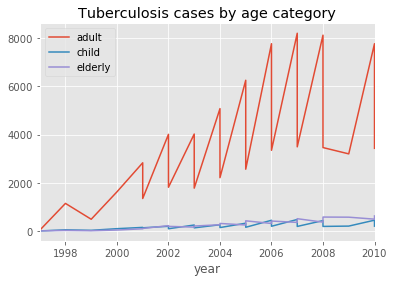

In [197]:
plt.close('all')

d = {'year': df.year,
    'adult' : df.adult,
     'child' : df.child,
     'elderly': df.elderly}

plotData = pd.DataFrame(d)

plotData.plot(title='Tuberculosis cases by age category', x='year')
plt.show()


### Conclusion
After analysing this data, we determined that females in Afganistan have a higher chance to catch tuberculosis than males. Using visual tool, we can see that desease cases for adults outnumber those for childrent and elderly. 